# Bài tập 8 - Cân bằng histogram

Input: Ảnh mức xám chưa cân bằng histogram

Output: Ảnh mức xám đã cân bằng histogram

Bước 1: Load ảnh grayscale 

Bước 2: Tính histogram

Bước 3: Tính tổng tích luỹ CDF

Bước 4: Tính mapping màu từ ảnh input sang màu output

Bước 5: Hiển thị hình ảnh

**Testcase minh họa:**

Input: 

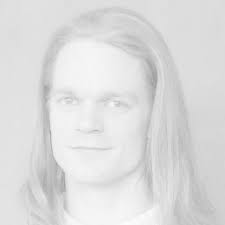



Output: 

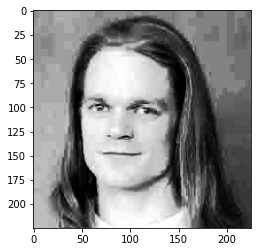

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
%cd /content/drive/MyDrive/MyDrive/UIT Documents/SUBJECTS/NHAP MON CV/notebook-cham-diem/Bai8

/content/drive/MyDrive/MyDrive/UIT Documents/SUBJECTS/NHAP MON CV/notebook-cham-diem/Bai8


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def sol(img_path):
  # 1. load anh grayscale
  # 2. tinh histogram (np.unique)
  # 3. tinh tong tich luy CDF
  # 4. Mapping image


  ### BEGIN SOLUTION
  # 1. load anh grayscale
  img = cv2.imread(img_path, 0)
  result = img.copy()

  # 2. tinh histogram
  (pixel, hist_matrix) = np.unique(img, return_counts=True)

  # 3. tinh tong tich luy CDF
  cdf = [0]
  for i, _ in enumerate(pixel): 
      cdf.append(cdf[-1] + hist_matrix[i])
  cdf = cdf[1:]

  min_value = cdf[0]
  max_value = cdf[-1]
  cdf = [(i - min_value)/(max_value - min_value) for i in cdf]
  cdf = np.array(cdf)
  cdf *= 255
  cdf = cdf.astype(int)

  # 4. Mapping image
  for i, value in enumerate(pixel): 
      result[img == value] = cdf[i]
  ### END SOLUTION

  return result


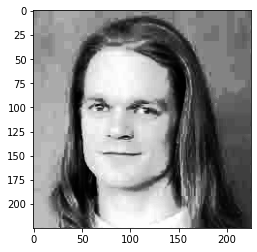

In [24]:
# test với testcase mẫu
result = sol(img_path='testcase1.jpeg')

cv2.imwrite('result_testcase.jpg', result)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

In [25]:
# cham diem voi testcase mau
def evaluate(img1, img2):
  img1 = img1.astype(np.int16)
  img2 = img2.astype(np.int16)
  return np.mean(np.abs(img1 - img2))/255. < 0.01
  
testcase = cv2.imread('result_testcase.jpg', 0)
assert evaluate(result, testcase)

In [26]:
### BEGIN HIDDEN TESTS
def sol_for_test(img_path):
  # 1. load anh grayscale
  img = cv2.imread(img_path, 0)
  result = img.copy()

  # 2. tinh histogram
  (pixel, hist_matrix) = np.unique(img, return_counts=True)

  # 3. tinh tong tich luy CDF
  cdf = [0]
  for i, _ in enumerate(pixel): 
      cdf.append(cdf[-1] + hist_matrix[i])
  cdf = cdf[1:]

  min_value = cdf[0]
  max_value = cdf[-1]
  cdf = [(i - min_value)/(max_value - min_value) for i in cdf]
  cdf = np.array(cdf)
  cdf *= 255
  cdf = cdf.astype(int)

  # 4. Mapping image
  for i, value in enumerate(pixel): 
      result[img == value] = cdf[i]

  return result

assert np.all(sol_for_test('testcase1.jpeg') == sol('testcase1.jpeg')) and np.all(sol_for_test('testcase2.jpg') == sol('testcase2.jpg'))
### END HIDDEN TESTS